# Лабораторная работа 2

## Полносвязная нейронная сеть

Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.

In [1]:
%cd /content/drive/MyDrive/Colab/neuro

/content/drive/MyDrive/Colab/neuro


In [2]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

%cd /content/drive/MyDrive/Colab/neuro/scripts/classifiers
from neural_net import TwoLayerNet
%cd /content/drive/MyDrive/Colab/neuro

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

/content/drive/MyDrive/Colab/neuro/scripts/classifiers
/content/drive/MyDrive/Colab/neuro


1. Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных (Код приведен ниже).  

In [3]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()
print(X,y)

[[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]] [0 1 2 2 1]


# Прямой проход: вычисление выхода сети

Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных.

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

In [4]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08



# Прямой проход: вычисление loss

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [5]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Обратный проход

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода.  Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2.


In [6]:
from gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11


# Обучение нейронной сети на смоделированных данных

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.


Final training loss:  0.017149607938732093


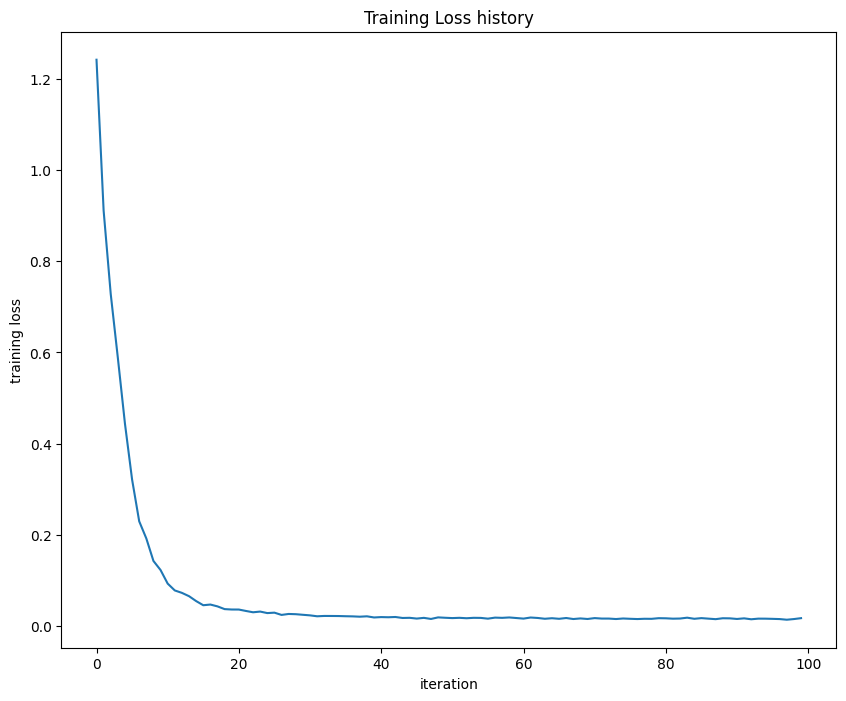

In [7]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

Загрузите набор данных, соответствующий вашему варианту.

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1.

Обучите нейронную сеть на ваших данных.

При сдаче лабораторной работы объясните значения всех параметров метода train.

In [8]:
#Загрузите набор данных, соответствующий вашему варианту.
from dataut import load_CIFAR10
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

#Разделите данные на обучающую, тестовую и валидационную выборки.
num_train = 4900
num_test = 9000
num_val = 1000

net_X_train = X_train[range(num_train)]
net_y_train = y_train[range(num_train)]

net_X_test = X_test[range(num_test)]
net_y_test = y_test[range(num_test)]

net_X_val = X_train[range(num_train, num_train + num_val)]
net_y_val = y_train[range(num_train, num_train + num_val)]

#Выполните предобработку данных
net_X_train = np.reshape(net_X_train, (net_X_train.shape[0], -1)).astype(np.float64)
net_y_train = np.reshape(net_y_train, (net_y_train.shape[0],))

net_X_test = np.reshape(net_X_test, (net_X_test.shape[0], -1)).astype(np.float64)
net_y_test = np.reshape(net_y_test, (net_y_test.shape[0],))

net_X_val = np.reshape(net_X_val, (net_X_val.shape[0], -1)).astype(np.float64)
net_y_val = np.reshape(net_y_val, (net_y_val.shape[0],))

print('Training data shape: ', net_X_train.shape)
print('Training labels shape: ', net_y_train.shape)
print('Test data shape: ', net_X_test.shape)
print('Test labels shape: ', net_y_test.shape)
print('Validation data shape: ', net_X_val.shape)
print('Validation labels shape: ', net_y_val.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
Training data shape:  (4900, 3072)
Training labels shape:  (4900,)
Test data shape:  (9000, 3072)
Test labels shape:  (9000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)


In [9]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(net_X_train, net_y_train, net_X_val, net_y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

val_acc = (net.predict(net_X_val) == net_y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.303012
iteration 100 / 1000: loss 2.301555
iteration 200 / 1000: loss 2.265692
iteration 300 / 1000: loss 2.190513
iteration 400 / 1000: loss 2.122485
iteration 500 / 1000: loss 2.072700
iteration 600 / 1000: loss 2.091854
iteration 700 / 1000: loss 2.089284
iteration 800 / 1000: loss 2.073053
iteration 900 / 1000: loss 1.986274
Validation accuracy:  0.24


Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29.

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др.

Для лучшей модели вычислите acсuracy на тестовом наборе.

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков.

In [31]:
# Лучшие гиперпараметры из всех комбинаций, полученные в ячейке выше:
hidden_size = 100
learning_rate = 0.1
reg = 0.01
learning_rate_decay = 0.9
num_iters = 500
batch_size = 200
net = TwoLayerNet(input_size, hidden_size, num_classes)
stats = net.train(net_X_train, net_y_train, net_X_val, net_y_val,
                  num_iters=num_iters, batch_size=batch_size,
                  learning_rate=learning_rate, learning_rate_decay=learning_rate_decay,
                  reg=reg, verbose=True)

# Оценки качества на валидационном и тестовом наборах данных
val_accuracy = (net.predict(net_X_val) == net_y_val).mean()
test_accuracy = (net.predict(net_X_test) == net_y_test).mean()

print(f"val accuracy = {val_accuracy}")
print(f"test accuracy = {test_accuracy}")

iteration 0 / 500: loss 2.302551


/content/drive/MyDrive/Colab/neuro/scripts/classifiers/neural_net.py:101: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-np.log(softmax_matrix[np.arange(N), y]))#вычисление кросс-энтропийной функции потерь


iteration 100 / 500: loss 1356.492660
iteration 200 / 500: loss 1112.340105
iteration 300 / 500: loss 978.695120
iteration 400 / 500: loss 901.145427
val accuracy = 0.095
test accuracy = 0.1


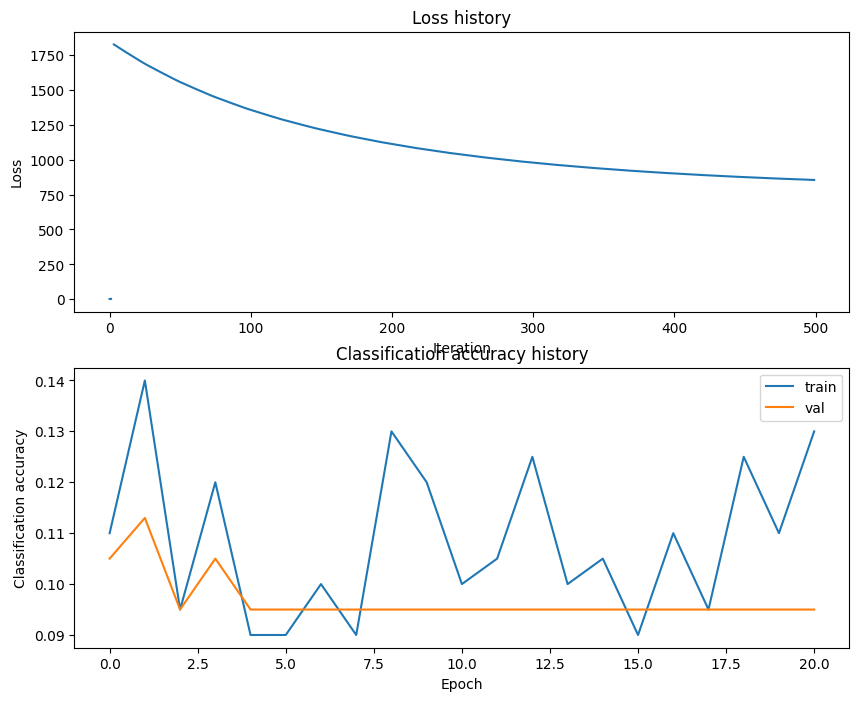

In [32]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

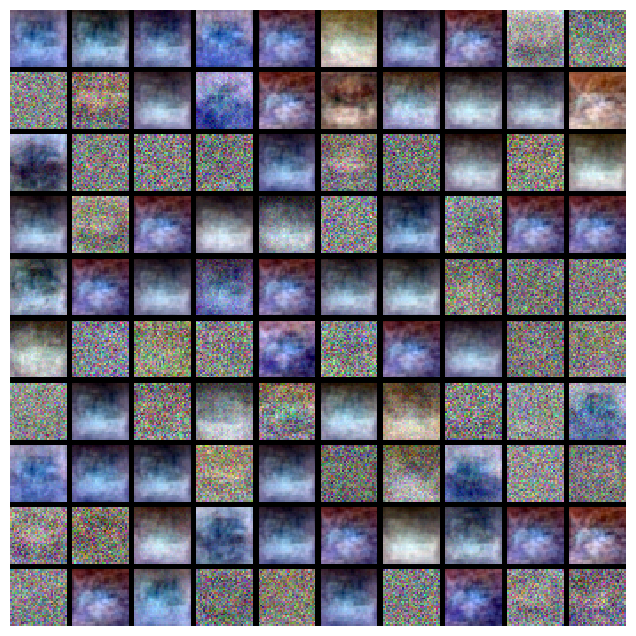

In [33]:
from scripts.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

Сделайте выводы по результатам работы.

- Все задания выполнены успешно.
- На тестовых данных достигнут результат с точностью около .
- Для определения оптимального набора параметров было необходимо протестировать большое количество комбинаций, что заняло значительное время(пока занимает).
